# Performing Analysis on the Dataset
Experiment No         : 2

Date                  : 01/02/2023

---

#### Import the required packages

In [1]:
import pandas as pd
import numpy as np

#### Read the dataset (CSV file) from filesystem

In [2]:
df = pd.read_csv("res/aug_train.csv")
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


## Preprocessing

#### Remove unnecessary columns from the dataframe

In [3]:
if 'enrollee_id' in df.columns:
    df = df.drop('enrollee_id', axis=1)
df.describe()

,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000
mean,0.828848,65.366896,0.249348
std,0.123362,60.058462,0.432647
min,0.448000,1.000000,0.000000
25%,0.740000,23.000000,0.000000
50%,0.903000,47.000000,0.000000
75%,0.920000,88.000000,0.000000
max,0.949000,336.000000,1.000000


#### [DISPLAY] `NAN` present in the dataframe `df`

In [4]:
df.isna().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

#### [Preprocessing] Transforming `df[city]` for better representation

In [5]:
df['city'] = df['city'].apply(lambda c: int(c[5:]))
df['city']

0        103
1         40
2         21
3        115
4        162
        ... 
19153    173
19154    103
19155    103
19156     65
19157     67
Name: city, Length: 19158, dtype: int64

#### [Preprocessing] Replacing `NaN` values in string oriented columns to `Unspecified`

In [6]:
unspecified_cols = ['gender', 'major_discipline', 'company_type']
df[unspecified_cols] = df[unspecified_cols].fillna("Unspecified")

#### Final "Preprocessed" dataset

In [7]:
df

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,Unspecified,1,36,1.0
1,40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,21,0.624,Unspecified,No relevent experience,Full time course,Graduate,STEM,5,NaN,Unspecified,never,83,0.0
3,115,0.789,Unspecified,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,Unspecified,1,42,1.0
19154,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,Unspecified,4,52,1.0
19155,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,65,0.802,Male,Has relevent experience,no_enrollment,High School,Unspecified,<1,500-999,Pvt Ltd,2,97,0.0


## Descriptive Analysis

#### Displaying the information about the dataframe using```df.info()```

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  int64  
 1   city_development_index  19158 non-null  float64
 2   gender                  19158 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        19158 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            19158 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(9)
memory usage: 1.9+ MB


#### Describing the dataframe using ```df.describe()```

In [9]:
df.describe()

,city,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,80.128876,0.828848,65.366896,0.249348
std,46.413570,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,21.000000,0.740000,23.000000,0.000000
50%,101.000000,0.903000,47.000000,0.000000
75%,104.000000,0.920000,88.000000,0.000000
max,180.000000,0.949000,336.000000,1.000000


#### Displaying the `null` values present within the dataframe `df`

In [10]:
df.isnull().sum()

city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline             0
experience                  65
company_size              5938
company_type                 0
last_new_job               423
training_hours               0
target                       0
dtype: int64

#### Importing `python` packages for visualization

## Univariate Analysis

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Analyzing the frequency of gender distribution

In [12]:
df['gender'].value_counts()

Male           13221
Unspecified     4508
Female          1238
Other            191
Name: gender, dtype: int64

#### Obtaining Mean, Median, Mode, Standard deviation, Variance and Skewness of an atttribute

In [25]:
from scipy.stats import skew

print(f"Minimum training hours: {df['training_hours'].min()}")
print(f"Maximum training hours: {df['training_hours'].max()}")
print(f"Average training hours: {df['training_hours'].mean()}")
print(f"Standard Deviation: {df['training_hours'].std()}")
print(f"Variance: {df['training_hours'].var()}")
print(f"Skewness: {skew(df['training_hours'])}")

Minimum training hours: 1
Maximum training hours: 336
Average training hours: 65.36689633573442
Standard Deviation: 60.05846192467829
Variance: 3607.0188487580317
Skewness: 1.8190947994281477


#### Visualizing the `df['gender']` of the dataframe `df` 

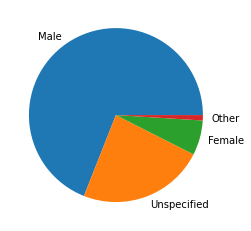

In [23]:
#sns.countplot(x='gender', data=df)
plt.pie(df['gender'].value_counts(), labels=['Male', 'Unspecified', 'Female', 'Other'])
plt.show()

#### Analysis using histogram

(array([  178.,  3297.,  1529.,  1949., 12205.]),
 array([0.448 , 0.5482, 0.6484, 0.7486, 0.8488, 0.949 ]),
 <BarContainer object of 5 artists>)

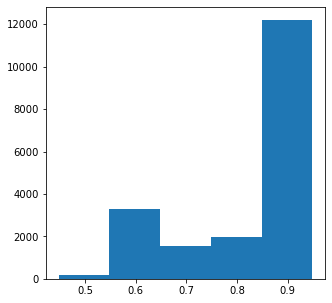

In [15]:
fig, axes = plt.subplots(figsize=(5,5))
axes.hist(df['city_development_index'], bins=5)

#### Visualizing using Scatterplot (city_development_index, training_hours, target)

## Bivariate Analysis

#### Pearson Correlation Coefficient between various attributed in the dataset

In [16]:
df.corr(method='pearson')c 

,city,city_development_index,training_hours,target
city,1.000000,0.410647,-0.005665,-0.143475
city_development_index,0.410647,1.000000,0.001920,-0.341665
training_hours,-0.005665,0.001920,1.000000,-0.021577
target,-0.143475,-0.341665,-0.021577,1.000000


#### Cross Table (Gender, Major Discipline)

In [26]:
pd.crosstab(df['gender'], df['major_discipline'])

major_discipline,Arts,Business Degree,Humanities,No Major,Other,STEM,Unspecified
gender,,,,,,,
Female,36,25,118,16,36,928,79
Male,160,226,429,163,247,10145,1851
Other,7,3,8,3,7,115,48
Unspecified,50,73,114,41,91,3304,835


#### BarPlot (Experience, Training Hours)

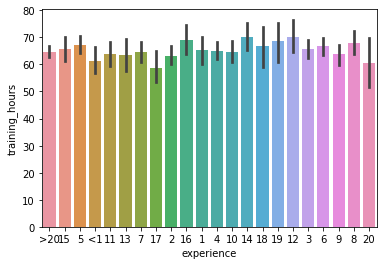

In [17]:
sns.barplot(x='experience', y='training_hours', data=df)
plt.show()

## Multivariate Analysis

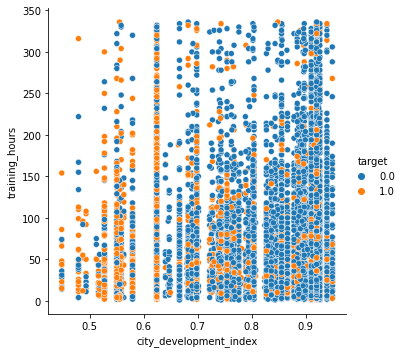

In [18]:
sns.relplot(x='city_development_index', y='training_hours', hue='target', data=df)
plt.show()

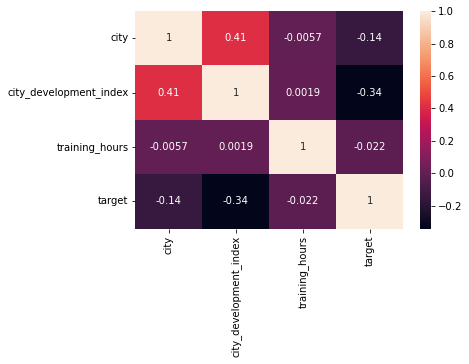

In [19]:
sns.heatmap(df.corr(method='pearson'), annot=True)
plt.show()